# ISIC 2018 Dataset

In [1]:
%matplotlib inline

import random
import numpy as np
import os
import csv
from PIL import Image
from collections import Counter
from fractions import Fraction

import matplotlib.pyplot as plt
from IPython import display

In [35]:
root_dir = '.'
img_dir = os.path.join(root_dir, 'ISIC2018_Task3_Training_Input')

## Load Image List and Labels

In [4]:
with open(os.path.join(root_dir, 'ISIC2018_Task3_Training_GroundTruth.csv')) as f:
    reader = csv.DictReader(f)
    classnames = reader.fieldnames[1:]
    class2idx = { classname : i for i, classname in enumerate(classnames) }
    labels = { l['image'] : max(range(len(classnames)), key=lambda lbl: float(l[classnames[lbl]])) for l in reader }
len(labels)

10015

In [9]:
classnames

['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

## Label Distribution

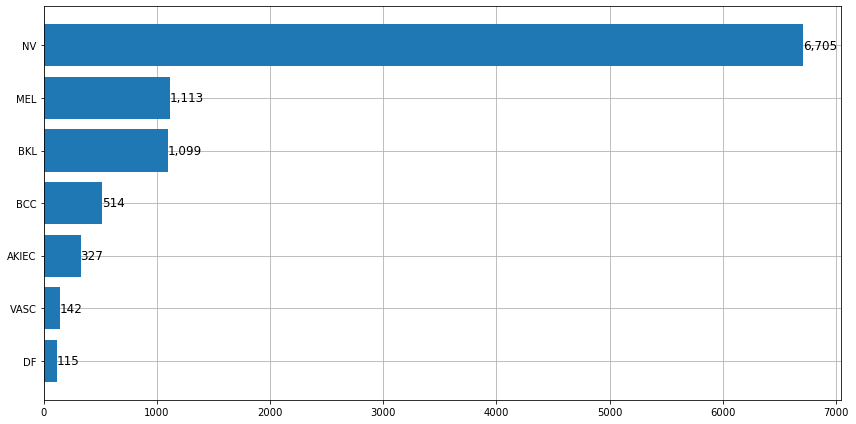

In [25]:
class_sizes = Counter(labels.values())
sorted_sizes = class_sizes.most_common()

plt.figure(figsize=(12, 6))
plt.barh(range(len(classnames)), [s for _, s in sorted_sizes[::-1]])
plt.yticks(range(len(classnames)), [classnames[lbl] for lbl, _ in sorted_sizes[::-1]])
for i, (_, s) in enumerate(sorted_sizes[::-1]):
    plt.annotate(f'{s:,}', (s, i), ha='left', va='center', fontsize=12)
plt.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

## Example Images

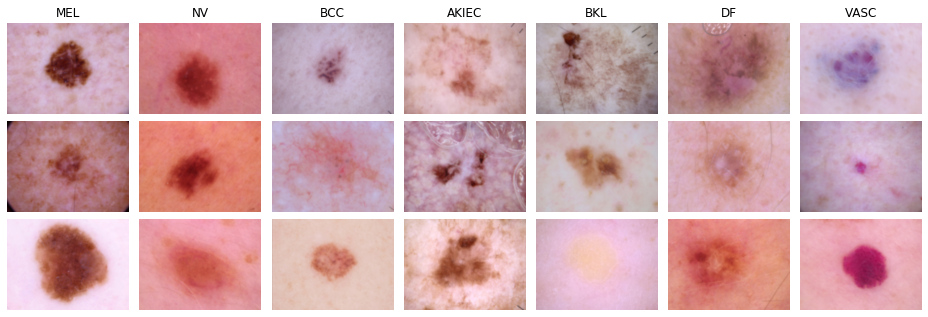

In [28]:
fig, axes = plt.subplots(3, len(classnames), figsize=(13, 4.5))
for lbl, col in enumerate(axes.T):
    class_members = [fn for fn, img_lbl in labels.items() if img_lbl == lbl]
    col[0].set_title(classnames[lbl])
    for ax in col:
        fn = random.choice(class_members)
        ax.imshow(plt.imread(os.path.join(img_dir, fn + '.jpg')), interpolation='bicubic')
        ax.axis('off')
fig.tight_layout()
plt.show()

## Image Sizes and Aspect Ratios

In [29]:
img_sizes = np.array([Image.open(os.path.join(img_dir, fn + '.jpg')).size for fn in labels.keys()])

In [33]:
Counter(tuple(s) for s in img_sizes).most_common(10)

[((600, 450), 10015)]

## Train/Val/Test Split

    Train:       50 imgs/class
    Val:         30 imgs/class
    Test: up to 400 imgs/class

In [34]:
class_members = [
    [fn for fn, lbl in labels.items() if lbl == i]
    for i in range(len(classnames))
]

for mem in class_members:
    random.shuffle(mem)

In [37]:
with open(os.path.join(root_dir, 'train.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[:50]:
            f.write(f'{fn} {lbl_idx}\n')

with open(os.path.join(root_dir, 'val.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[50:80]:
            f.write(f'{fn} {lbl_idx}\n')

with open(os.path.join(root_dir, 'trainval.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[:80]:
            f.write(f'{fn} {lbl_idx}\n')

with open(os.path.join(root_dir, 'test.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[80:480]:
            f.write(f'{fn} {lbl_idx}\n')